In [220]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
# Leer datos
data = pd.read_csv('/content/drive/MyDrive/datasets/MisDatasets/energydata_complete.csv')
X = data[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
          'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8',
          'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
          'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'lights']].values
y = data['Appliances'].values

m = y.size

In [223]:
X.shape

(19735, 27)

In [224]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


In [225]:
# Normalizar las características
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X_norm)
print('Media calculada:', mu)
print('Desviación estándar calculada:', sigma)

[[-1.11864475  1.84382063 -0.52041138 ... -0.80797358 -0.80797358
   3.30126384]
 [-1.11864475  1.61680671 -0.52041138 ... -0.44024015 -0.44024015
   3.30126384]
 [-1.11864475  1.51795932 -0.52041138 ...  0.25210868  0.25210868
   3.30126384]
 ...
 [ 2.37445166  1.59251371  2.41110339 ...  0.29049435  0.29049435
   0.78103476]
 [ 2.37445166  1.6913611   2.31325594 ... -1.28759013 -1.28759013
   0.78103476]
 [ 2.37445166  1.5933514   2.24498422 ...  0.6298737   0.6298737
   0.78103476]]
Media calculada: [ 21.68657139  40.25973928  20.34121946  40.42042041  22.26761098
  39.24250008  20.85533472  39.02690379  19.59210633  50.94928263
   7.91093933  54.60908339  20.26710647  35.38820022  22.02910672
  42.93616537  19.48582816  41.55240075   7.41166456 755.52260198
  79.75041804   4.03975171  38.33083354   3.76070687  24.98803349
  24.98803349   3.80187484]
Desviación estándar calculada: [ 1.60602495  3.97919801  2.19291797  4.06970943  2.00605971  3.25449403
  2.04283272  4.34121066  1.84

In [226]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)


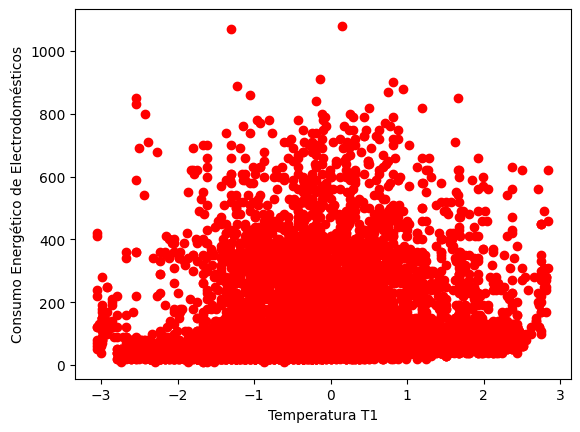

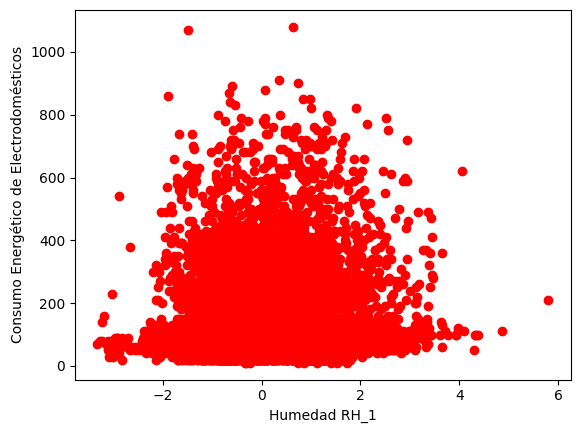

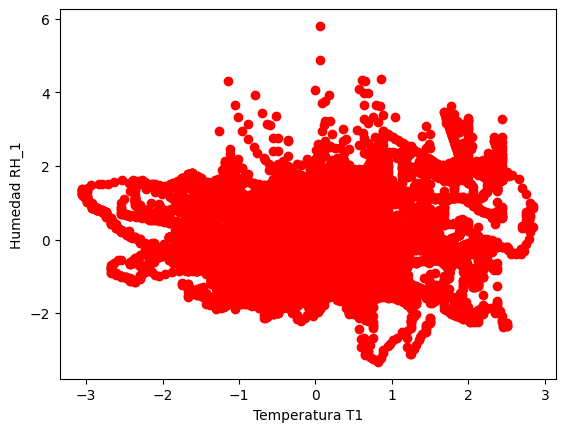

In [227]:
xlabel1 = "Temperatura T1"
xlabel2 = "Humedad RH_1"
ylabel1 = "Consumo Energético de Electrodomésticos"
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)


In [228]:
# No olvidarse agregar unos a la matriz de x
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [229]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [230]:
# Inicializar theta con ceros
theta = np.zeros(X_ready.shape[1])

# Parámetros para el descenso de gradiente
num_ite = 100000
alpha = 0.0001

In [231]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
    m = y.size
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_historico.append(calcularCosto(X, y, theta))
    return theta, J_historico

Los valores de theta calculados son: [ 97.69052507  -6.30577893  29.66266743   3.71463333 -11.63399146
  29.52711497  12.85453783 -10.21399875  -0.44774597  -7.81012745
   0.77094501   9.47860146   0.24998258  -3.013392   -12.20841337
   6.78733321 -18.56981159 -10.68072323  -6.04388833  -3.05369912
  -0.6746479   -3.85314869   3.84446336   1.61021529  -3.65910068
  -0.32787623  -0.32787623  17.3440475 ]
Con un costo de: 4486.6109013277255


Text(0, 0.5, 'Costo J')

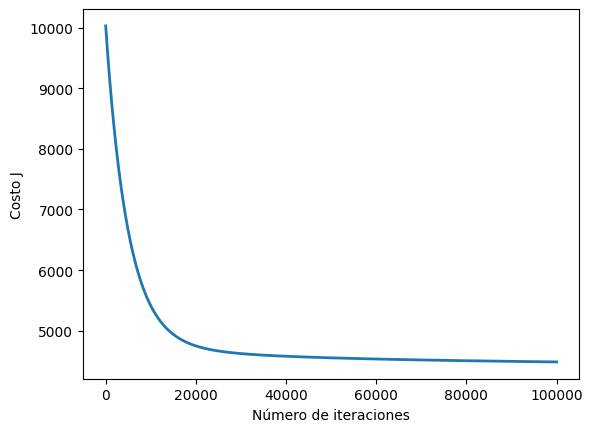

In [232]:
theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"Los valores de theta calculados son: {theta}")
print(f"Con un costo de: {J_historico[-1]}")

# Graficar la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')


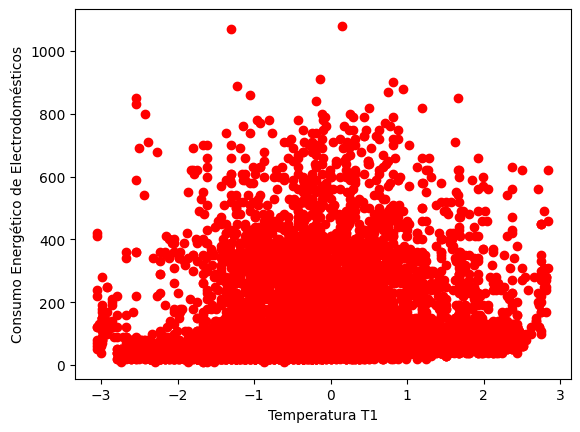

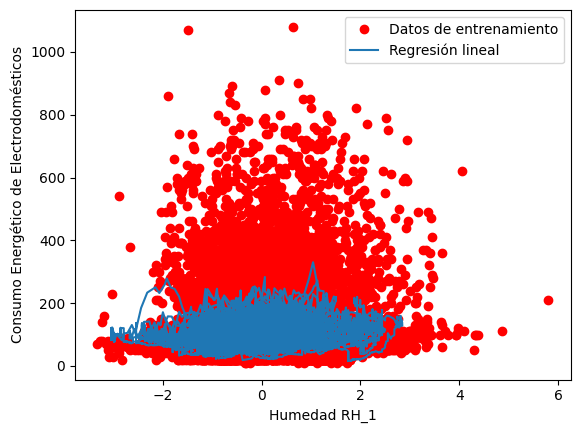

In [233]:
# Graficar relación entre algunas variables de entrada y la salida
graficarDatos(X_ready[:, 1], y, xlabel1, ylabel1)
graficarDatos(X_ready[:, 2], y, xlabel2, ylabel1)

# Graficar la regresión lineal
pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal'])


In [234]:
y_pred = np.dot(X_ready[0], theta)
print(f"Predicción para los valores de entrada {X_ready[0, 1]}, {X_ready[0, 2]}: {y_pred}")


Predicción para los valores de entrada -1.1186447525782859, 1.8438206309130616: 174.2912794288814


In [235]:
def calcularThetaEcuacionNormal(X, y):
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),y)
    return theta

In [236]:
theta_normal = calcularThetaEcuacionNormal(X_ready, y)
print(f"Los valores de theta calculados usando la ecuación normal son: {theta_normal}")


Los valores de theta calculados usando la ecuación normal son: [ 9.76949582e+01 -9.69622223e-01  6.02992552e+01 -3.88278459e+01
 -5.48622048e+01  5.09667490e+01  1.60269871e+01 -7.07893137e+00
 -7.76676157e-01 -5.13592506e-02  1.27171970e+00  4.33997015e+01
  8.96928745e+00  3.78655728e+00 -7.92520786e+00  1.59355893e+01
 -2.43954580e+01 -3.19775705e+01 -3.74049014e+00 -5.43860899e+01
  1.03483137e+00 -1.58505807e+01  4.17588302e+00  1.81257847e+00
  2.11774075e+01 -3.01179400e-01 -3.01179400e-01  1.57899037e+01]


In [237]:
# Crear un array con todas las características, incluyendo la columna de 1s para el término de bias
X_array = np.concatenate([[1], X_ready[0, 1:]])

# Realizar la predicción usando la ecuación normal
price = np.dot(X_array, theta_normal)
print(f"Predicción usando la ecuación normal: {price}")

Predicción usando la ecuación normal: 166.0388872296854
